In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
from citipy import citipy

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | ribeira grande
Processing Record 2 of Set 12 | okha
Processing Record 3 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 12 | georgetown
Processing Record 5 of Set 12 | bluff
Processing Record 6 of Set 12 | natal
Processing Record 7 of Set 12 | rikitea
Processing Record 8 of Set 12 | port elizabeth
Processing Record 9 of Set 12 | tasiilaq
Processing Record 10 of Set 12 | samusu
City not found. Skipping...
Processing Record 11 of Set 12 | punta arenas
Processing Record 12 of Set 12 | kaitangata
Processing Record 13 of Set 12 | vaini
Processing Record 14 of Set 12 | naze
Processing Record 15 of Set 12 | port alfred
Processing Record 16 of Set 12 | busselton
Processing Record 17 of Set 12 | torbay
Processing Record 18 of Set 12 | cabo san lucas
Processing Record 19 of Set 12 | hermanus
Processing Record 20 of Set 12 | saint-jean-de-luz
Processing Record 21 of Set 

Processing Record 34 of Set 15 | saint-philippe
Processing Record 35 of Set 15 | vestmanna
Processing Record 36 of Set 15 | madang
Processing Record 37 of Set 15 | mokolo
Processing Record 38 of Set 15 | nouakchott
Processing Record 39 of Set 15 | manggar
Processing Record 40 of Set 15 | taolanaro
City not found. Skipping...
Processing Record 41 of Set 15 | holetown
Processing Record 42 of Set 15 | faya
Processing Record 43 of Set 15 | loreto
Processing Record 44 of Set 15 | saleaula
City not found. Skipping...
Processing Record 45 of Set 15 | san cristobal
Processing Record 46 of Set 15 | khonuu
City not found. Skipping...
Processing Record 47 of Set 15 | chicama
Processing Record 48 of Set 15 | tarancon
Processing Record 49 of Set 15 | pacific grove
Processing Record 50 of Set 15 | erenhot
Processing Record 1 of Set 16 | boende
Processing Record 2 of Set 16 | birao
Processing Record 3 of Set 16 | biltine
Processing Record 4 of Set 16 | saint-pierre
Processing Record 5 of Set 16 | yan

Processing Record 18 of Set 19 | marawi
Processing Record 19 of Set 19 | kanor
Processing Record 20 of Set 19 | radnevo
Processing Record 21 of Set 19 | hendijan
City not found. Skipping...
Processing Record 22 of Set 19 | ust-kamchatsk
City not found. Skipping...
Processing Record 23 of Set 19 | hasaki
Processing Record 24 of Set 19 | marzuq
Processing Record 25 of Set 19 | vitoria da conquista
Processing Record 26 of Set 19 | hazorasp
Processing Record 27 of Set 19 | mullaitivu
City not found. Skipping...
Processing Record 28 of Set 19 | flin flon
Processing Record 29 of Set 19 | pangkalanbuun
Processing Record 30 of Set 19 | shache
Processing Record 31 of Set 19 | henties bay
Processing Record 32 of Set 19 | matveyevka
Processing Record 33 of Set 19 | asau
Processing Record 34 of Set 19 | zirandaro
Processing Record 35 of Set 19 | college
Processing Record 36 of Set 19 | aranos
Processing Record 37 of Set 19 | komsomolskiy
Processing Record 38 of Set 19 | balkanabat
Processing Recor

Processing Record 1 of Set 23 | pionerskiy
Processing Record 2 of Set 23 | neka
Processing Record 3 of Set 23 | genhe
Processing Record 4 of Set 23 | olafsvik
Processing Record 5 of Set 23 | takoradi
Processing Record 6 of Set 23 | zaranj
Processing Record 7 of Set 23 | amapa
Processing Record 8 of Set 23 | kenai
Processing Record 9 of Set 23 | maceio
Processing Record 10 of Set 23 | kungurtug
Processing Record 11 of Set 23 | minden
Processing Record 12 of Set 23 | cabuyaro
Processing Record 13 of Set 23 | nhulunbuy
Processing Record 14 of Set 23 | aswan
Processing Record 15 of Set 23 | pishva
Processing Record 16 of Set 23 | terney
Processing Record 17 of Set 23 | bambanglipuro
Processing Record 18 of Set 23 | norman wells
Processing Record 19 of Set 23 | jalu
Processing Record 20 of Set 23 | whitianga
Processing Record 21 of Set 23 | mayumba
Processing Record 22 of Set 23 | atkarsk
Processing Record 23 of Set 23 | englehart
Processing Record 24 of Set 23 | muroto
Processing Record 25

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bosaso,11.2842,49.1816,91.80,47,66,5.01,SO,2022-09-13 22:26:30
1,Taoudenni,22.6783,-3.9836,100.20,7,4,9.75,ML,2022-09-13 22:26:31
2,Khatanga,71.9667,102.5000,31.37,96,99,5.28,RU,2022-09-13 22:26:31
3,Albany,42.6001,-73.9662,68.36,92,74,1.01,US,2022-09-13 22:22:23
4,Hobart,-42.8794,147.3294,46.26,79,20,6.91,AU,2022-09-13 22:26:32
5,San Lorenzo De El Escorial,40.5914,-4.1474,60.85,89,86,4.99,ES,2022-09-13 22:26:32
6,Barrow,71.2906,-156.7887,37.42,87,100,26.46,US,2022-09-13 22:26:32
7,Hilo,19.7297,-155.0900,82.62,76,75,7.00,US,2022-09-13 22:26:33
8,Rawson,-43.3002,-65.1023,57.67,53,6,22.62,AR,2022-09-13 22:26:33
9,Busselton,-33.6500,115.3333,53.74,68,75,16.55,AU,2022-09-13 22:26:34


In [8]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bosaso,SO,2022-09-13 22:26:30,11.2842,49.1816,91.80,47,66,5.01
1,Taoudenni,ML,2022-09-13 22:26:31,22.6783,-3.9836,100.20,7,4,9.75
2,Khatanga,RU,2022-09-13 22:26:31,71.9667,102.5000,31.37,96,99,5.28
3,Albany,US,2022-09-13 22:22:23,42.6001,-73.9662,68.36,92,74,1.01
4,Hobart,AU,2022-09-13 22:26:32,-42.8794,147.3294,46.26,79,20,6.91
5,San Lorenzo De El Escorial,ES,2022-09-13 22:26:32,40.5914,-4.1474,60.85,89,86,4.99
6,Barrow,US,2022-09-13 22:26:32,71.2906,-156.7887,37.42,87,100,26.46
7,Hilo,US,2022-09-13 22:26:33,19.7297,-155.0900,82.62,76,75,7.00
8,Rawson,AR,2022-09-13 22:26:33,-43.3002,-65.1023,57.67,53,6,22.62
9,Busselton,AU,2022-09-13 22:26:34,-33.6500,115.3333,53.74,68,75,16.55


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
#Import the time module
import time
#Get todays date in seconds 
today = time.time()
today

1663116991.132122

In [30]:
today= time.strftime("%x")
today

'09/13/22'

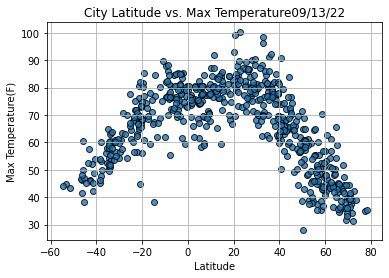

In [31]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature. 
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

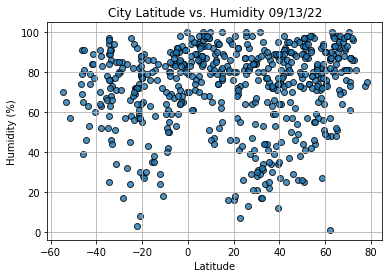

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

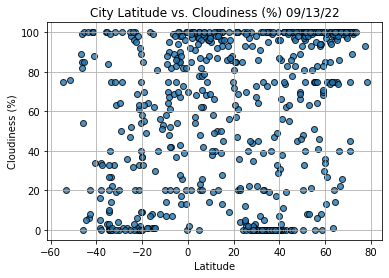

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed. 
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt